# Netflix data exploration
Testing my exploratory data analysis skills using the netflix dataset

## Importing the data and simple cleaning
In this section I will import the data and clean it in preperation for later. First I will make 2 data frames, one with just TV shows and one with Movies. I will then check that there is really only TV shows and movies. Once this has been confirmed the type coloum will be removed from the dataframe

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [119]:
print(df['type'].unique())
movie = df[df["type"] == 'Movie']
tv = df[df["type"] == 'TV Show']
tv=tv.drop(['type','description'],axis=1)
movie=movie.drop(['type','description'],axis=1)

['Movie' 'TV Show']


### Missing data and data types
Now we need to check that there is no missing values and if there are we need to deal with them

In [120]:
total = tv.isnull().sum().sort_values(ascending=False)
percent = (tv.isnull().sum()/tv.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
director,2446,0.914051
country,391,0.146114
cast,350,0.130792
date_added,10,0.003737
rating,2,0.000747


In [121]:
total = movie.isnull().sum().sort_values(ascending=False)
percent = (movie.isnull().sum()/movie.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
cast,475,0.077475
country,440,0.071766
director,188,0.030664
duration,3,0.000489
rating,2,0.000326


I will explain each coloumn for the TV dataframe and how I will deal with them:
* **Director** for TV shows are hard to do anyway as each episode have a different director, thus this will be dropped. 
* **Rating** As there are only 2 missing values I will add these manually 
* **Data Added** I will also try and add these manually, if I cant find them I will estimate based on the realse date
* **Cast** and **Country** These have alot of missing data, in a idealy world I will add these manually as they could easily be found. However due to the size I will leave them alone
I will explain each coloumn for the movie dataframe  and how I will deal with them:
* **Rating** As there are only 2 missing values I will add these manually 
* **Duration** I will also try and add these manually.
* **Cast**, **director** and **Country** These have alot of missing data, in a idealy world I will add these manually as they could easily be found. However due to the size I will leave them alone

In [122]:
tv=tv.drop(['director'],axis=1)

In [123]:
temp=tv[['rating','title']]
temp[temp.isnull().any(axis=1)]

,rating,title
6827,NaN,Gargantia on the Verdurous Planet
7312,NaN,Little Lunch


In [124]:
tv.loc[6827, 'rating'] = 'TV-14'
tv.loc[7312, 'rating'] = 'TV-MA'
temp=tv[['date_added','title']]
temp[temp.isnull().any(axis=1)]

,date_added,title
6066,NaN,A Young Doctor's Notebook and Other Stories
6174,NaN,Anthony Bourdain: Parts Unknown
6795,NaN,Frasier
6806,NaN,Friends
6901,NaN,Gunslinger Girl
7196,NaN,Kikoriki
7254,NaN,La Familia P. Luche
7406,NaN,Maron
7847,NaN,Red vs. Blue
8182,NaN,The Adventures of Figaro Pho


In [125]:
tv.loc[6806, 'date_added'] = 'January 01, 2015'

I have found it difficult to find the detials on when they where added to netflix so I will leave it.

In [126]:
temp=movie[['duration','title','rating']]
temp[temp.isnull().any(axis=1)]

,duration,title,rating
5541,NaN,Louis C.K. 2017,74 min
5794,NaN,Louis C.K.: Hilarious,84 min
5813,NaN,Louis C.K.: Live at the Comedy Store,66 min
5989,37 min,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN
7537,115 min,My Honor Was Loyalty,NaN


In [127]:
movie.loc[5541, 'duration'] = '74 min'
movie.loc[5794, 'duration'] = '84 min'
movie.loc[5813, 'duration'] = '66 min'
movie.loc[5541, 'rating'] = 'TV-MA'
movie.loc[5794, 'rating'] = np.nan #This has not been rating in the US
movie.loc[5813, 'rating'] = np.nan #Cant find
movie.loc[7537, 'rating'] = 'PG-13'

### Data types
All data I can add have been added and now I will check if the data types are correct

In [128]:
movie.dtypes

show_id         object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [129]:
tv.dtypes

show_id         object
title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [130]:
movie['duration'] = movie['duration'].map(lambda x: x.rstrip('min'))
movie['duration'] = movie['duration'].astype('int32')
tv['duration'] = tv['duration'].map(lambda x: x.rstrip('Seasons'))
tv['duration']=tv['duration'].astype('int32')
tv.date_added = tv.date_added.fillna('Jan 99, 1900') # To allow for the date_added to be split a value needed to imputed 
tv['year_added'] = tv['date_added'].apply(lambda x : x.split(', ')[-1])
tv['year_added']=tv['year_added'].astype('int32')
tv.loc[tv['year_added'] == 1900, 'year_added'] = np.nan # This then converts the missing value back to nan
tv['month_added'] = tv['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
tv.loc[tv['month_added'] == 'Jan', 'month_added'] = np.nan # This then converts the missing value back to nan
movie['year_added'] = movie['date_added'].apply(lambda x : x.split(', ')[-1])
movie['year_added']=movie['year_added'].astype('int32')
movie.loc[movie['year_added'] == 1900, 'year_added'] = np.nan
movie['month_added'] = movie['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
movie.loc[movie['month_added'] == 'Jan', 'month_added'] = np.nan

## EDA
The first thing to look at is the number of movies to TV shows on netflix, the important thing to consider though is that TV-shows have multiple seasons and episodes. For this reason I will also count TV-shows by the number of seasons, i.e. if there are 2 seasons I will count twice.

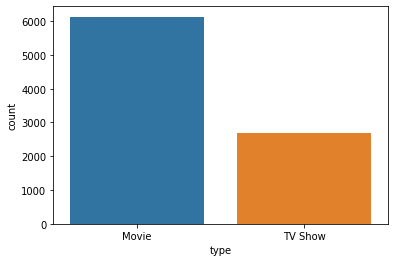

In [20]:
import seaborn as sns
ax = sns.countplot(x="type", data=df)

In [21]:
Total = tv['duration'].sum()
print ('The sum of the TV seasons is ',Total)
print ('The sum of the Movies are ',movie['duration'].count())

The sum of the TV seasons is  4723
The sum of the Movies are  6131


This increases the number of TV to better represent the quantilty.

### Duration
#### Movies

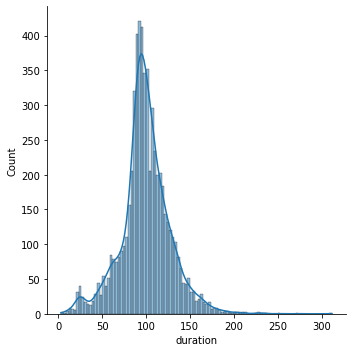

In [131]:
sns.displot(movie['duration'],kde=True)

This look like a gaussian distribution so I will try and fit one to it.

Fit results: mu = 99.56,  std = 28.29


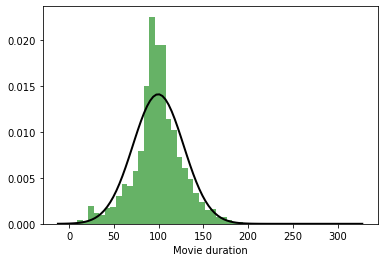

In [132]:
from scipy.stats import norm
import matplotlib.pyplot as plt

mu, std = norm.fit(movie['duration'])

# Plot the histogram.
plt.hist(movie['duration'], bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
print("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Movie duration')

plt.show()

As the first plot looks like it follows a gaussian distribution I tried to fit one to it, this also allows me to find the mean and standard deviation of the set, the mean value for the duration of a movie is 100 minitues. I wonder if there is a skewness that I havent considered before.

In [133]:
from scipy.stats import skew
print('The skewness of the data is ',skew(movie['duration']))

The skewness of the data is  0.20332589019663622


This shows that there is some positive skewness, meaning towards the y axis. This isnt surprising as there appears to be a bump around 25 minitues.    
Now I will look if there is a relation between the date released and the duration of the film

<AxesSubplot:xlabel='duration', ylabel='release_year'>

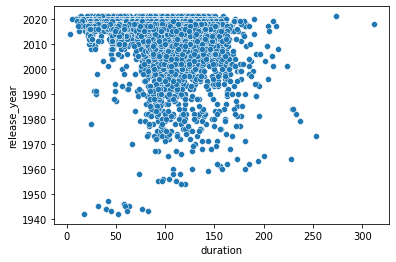

In [134]:
sns.scatterplot(data=movie, x="duration", y="release_year")

Unfortunalty due to the huge amount of modern movies accros a huge range of durations this plot is not very useful, instead the correlation between the 2 might be better

In [135]:
movie['duration'].corr(movie['release_year'])

-0.2063048329599621

This shows that there is some correlation but negative, this will be because there is more data for more recent years. Thus nothing interesting can be said about this relation. 
#### TV

<AxesSubplot:xlabel='duration', ylabel='Count'>

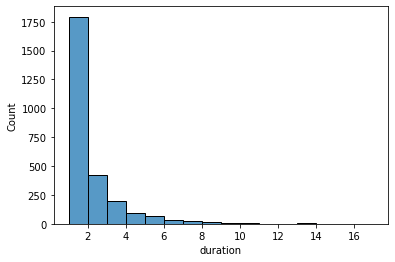

In [136]:
sns.histplot(data=tv, x="duration", binwidth=1)

In [28]:
from scipy.stats import skew
print('The skewness of the data is ',skew(tv['duration']))

The skewness of the data is  3.41665047981239


Unsurprising this is very highly skewed. We can also look at what shows produce the most seasons.

In [142]:
temp = tv[['duration','title']]
temp=temp.sort_values(by=['duration'], ascending=False)
temp=temp.rename(columns={"duration": "Number of Seasons"})
temp=temp.set_index('title')
temp.head()


,Number of Seasons
title,
Grey's Anatomy,17
Supernatural,15
NCIS,15
Heartland,13
COMEDIANS of the world,13


## Movie director

In [144]:
movie['director'].count()

5943

In [174]:
tot = movie['director'].value_counts().to_frame('counts')
tot=tot.reset_index()
tot=tot.rename(columns={"index": "director","count":"count"})
tot.head(10)

,director,counts
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,15
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


There is a number of directors that have a very high number of title on netflix, I wonder when these directors are most active. To do this I will find the mean realse year of there titles.

In [175]:
temp=movie.groupby("director")["release_year"].mean()

In [176]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['director'],how='outer'), [temp,tot])

In [177]:
df_merged=df_merged.sort_values(by=['counts'], ascending=False)
df_merged.head(10)

,director,release_year,counts
3252,Rajiv Chilaka,2012.263158,19
3303,"Raúl Campos, Jan Suter",2017.500000,18
3885,Suhas Kadav,2017.000000,16
2492,Marcus Raboy,2017.400000,15
1716,Jay Karas,2016.071429,14
661,Cathy Garcia-Molina,2014.461538,13
2562,Martin Scorsese,1996.333333,12
1713,Jay Chapman,2015.000000,12
4306,Youssef Chahine,1976.416667,12
3862,Steven Spielberg,1998.363636,11


As we can see most of the director have been mor active in the last 10 years than any other time.

## Ratings
### Movies

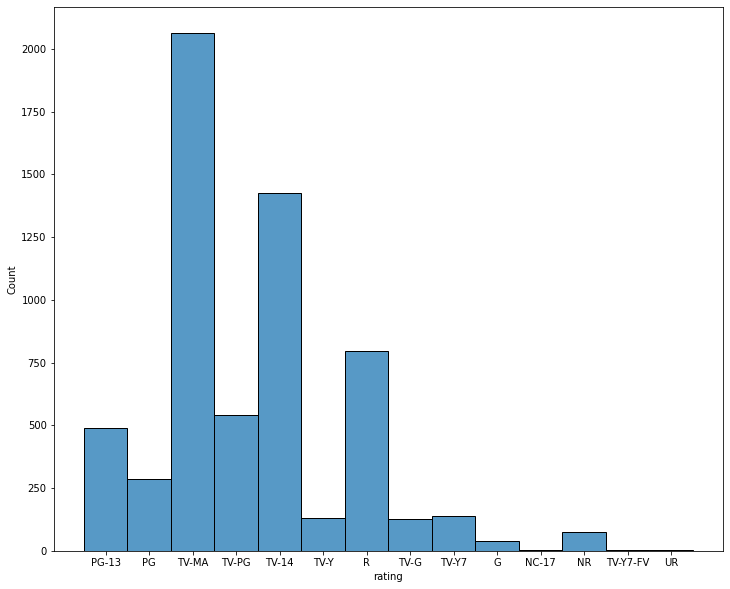

In [184]:
plt.figure(figsize=(12,10))
chart=sns.histplot(data=movie,x='rating')

Due to this having multiple different rating from different agencies I will try and combined them to get a better understanding, I accept that this may cause error on some titles. NR and UR both mean unrated so will be joined

In [187]:
movie.loc[movie['rating'] == 'TV-MA', 'rating'] = 'R'
movie.loc[movie['rating'] == 'TV-PG', 'rating'] = 'PG'
movie.loc[movie['rating'] == 'TV-14', 'rating'] = 'PG-15'
movie.loc[movie['rating'] == 'TV-Y', 'rating'] = 'G'
movie.loc[movie['rating'] == 'TV-G', 'rating'] = 'G'
movie.loc[movie['rating'] == 'TV-Y7', 'rating'] = 'G'
movie.loc[movie['rating'] == 'TV-Y7-FV', 'rating'] = 'G'
movie.loc[movie['rating'] == 'UR', 'rating'] = 'NR'

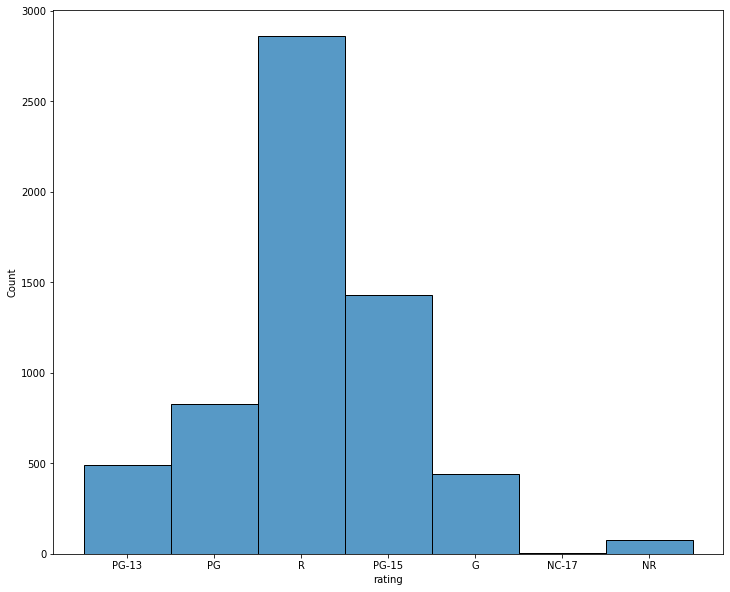

In [188]:
plt.figure(figsize=(12,10))
chart=sns.histplot(data=movie,x='rating')

In [190]:
total = movie['rating'].value_counts().sort_values(ascending=False)
percent = (movie['rating'].value_counts()/movie['rating'].count()).sort_values(ascending=False)
Ratings = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
Ratings.head()

,Total,Percent
R,2860,0.466710
PG-15,1427,0.232866
PG,827,0.134954
PG-13,491,0.080124
G,442,0.072128


This shows that the majority of the title on netflix is for matural audiences while very little is for children, this is not unsurprising.